In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import matplotlib.colors
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(" ", ["red", "yellow", "green"])

In [0]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


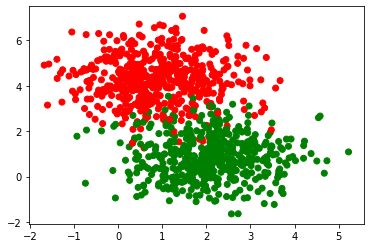

In [0]:
plt.scatter(data[:, 0], data[:, 1], cmap=my_cmap, c=labels)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=0)

In [0]:
print(X_train.shape, Y_test.shape, type(X_train))

(750, 2) (250,) <class 'numpy.ndarray'>


In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None
  
  def sigmoid(self, x):
    return 1 / (1+np.exp(-(np.dot(x, self.w.T) + self.b)))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(x)
    return (y_pred-y)*(1-y_pred)*y_pred*x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(x)
    return (y_pred-y)*(1-y_pred)*y_pred
  
  def fit(self, X, Y, lr=0.1, epochs=1000):
    self.w = np.random.rand(X.shape[1])
    self.b = 0
    loss = {}
    for epoch in tqdm_notebook(range(epochs), unit = "epochs", total = epochs):
      dw, db = 0, 0
      for x,y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)
      
      self.w -= lr*dw
      self.b -= lr*db

      Y_pred = self.sigmoid(X)
      loss[epoch] = mean_squared_error(Y, Y_pred)

    plt.plot(list(loss.values()))
    plt.xlabel("epoch")
    plt.ylabel("error")
    plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


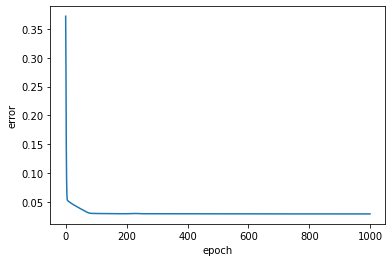

In [0]:
sn = SigmoidNeuron()
sn.fit(X_train, Y_train, lr=0.05, epochs=1000)

In [0]:
Y_pred_train = sn.sigmoid(X_train)
Y_pred_train = (Y_pred_train > 0.5).astype("int").ravel()
accuracy_score(Y_train, Y_pred_train)

0.964

In [0]:
Y_pred_test = sn.sigmoid(X_test)
Y_pred_test = (Y_pred_test > 0.5).astype("int").ravel()
accuracy_score(Y_test, Y_pred_test)

0.948

In [0]:
x1, x2 = X_train[0, :]

In [0]:
print(x1, x2)
type(x1)

-0.6255659704260419 3.41660638560335


numpy.float64

In [0]:
class FFN:
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0

  def sigmoid(self, x):
    return 1/(1+np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)

    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)

    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)

    return self.h3

  def grad(self, x, y):
    self.forward_pass(x)

    self.dw5 = (self.h3-y)*(1-self.h3)*self.h3*self.h1
    self.dw6 = (self.h3-y)*(1-self.h3)*self.h3*self.h2
    self.db3 = (self.h3-y)*(1-self.h3)*self.h3

    self.dw1 = (self.h3-y)*(1-self.h3)*self.h3*self.w5*(self.h1)*(1 - self.h1)*self.x1
    self.dw2 = (self.h3-y)*(1-self.h3)*self.h3*self.w5*(self.h1)*(1 - self.h1)*self.x2
    self.db1 = (self.h3-y)*(1-self.h3)*self.h3*self.w5*(self.h1-y)*(1 - self.h1)
  
    self.dw3 = (self.h3-y)*(1-self.h3)*self.h3*self.w6*(self.h2)*(1 - self.h2)*x1
    self.dw4 = (self.h3-y)*(1-self.h3)*self.h3*self.w6*(self.h2)*(1 - self.h2)*x2
    self.db2 = (self.h3-y)*(1-self.h3)*self.h3*self.w6*(self.h2)*(1 - self.h2)
  
  def fit(self, X, Y, epochs=100, lr = 0.01):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    loss = {}
    dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
    for epoch in tqdm_notebook(range(epochs), total = epochs, unit="epoch"):
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3

      m = X.shape[0]
      self.w1 -= lr*dw1/m
      self.w2 -= lr*dw2/m
      self.w3 -= lr*dw3/m
      self.w4 -= lr*dw4/m
      self.w5 -= lr*dw5/m
      self.w6 -= lr*dw6/m
      self.b1 -= lr*db1/m
      self.b2 -= lr*db2/m
      self.b3 -= lr*db3/m

      Y_pred = self.predict(X)
      loss[epoch] = mean_squared_error(Y_pred, Y)

  
    plt.plot(list(loss.values()))
    plt.xlabel("Epoch")
    plt.ylabel("error")
    plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


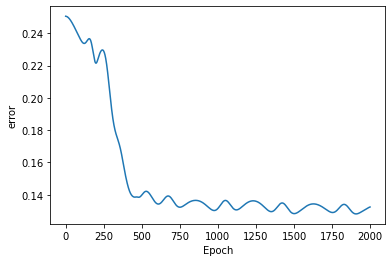

In [0]:
ffn = FFN()
ffn.fit(X_train, Y_train, epochs=2000, lr=0.01)

In [0]:
Y_pred_train = ffn.predict(X_train)
Y_pred_train = (Y_pred_train > 0.5).astype('int').ravel()
print(accuracy_score(Y_pred_train, Y_train))

0.848


In [0]:
Y_pred_test = ffn.predict(X_test)
Y_pred_test = (Y_pred_test > 0.5).astype('int').ravel()
print(accuracy_score(Y_pred_test, Y_test))

0.828


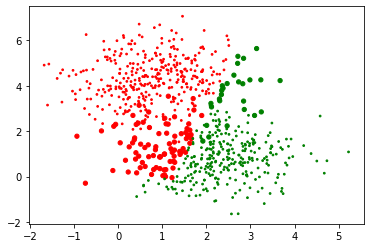

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(Y_pred_train-Y_train)+.2))
plt.show()